In [ ]:
# Import all required libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, silhouette_score, davies_bouldin_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **1. Read and Analize datasets**

In [ ]:
# Read the dataset
file_path = '/content/drive/MyDrive/Datasets/south+german+credit+update/SouthGermanCredit.asc'
df = pd.read_csv(file_path, sep=' ')
df.head(3)

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   laufkont  1000 non-null   int64
 1   laufzeit  1000 non-null   int64
 2   moral     1000 non-null   int64
 3   verw      1000 non-null   int64
 4   hoehe     1000 non-null   int64
 5   sparkont  1000 non-null   int64
 6   beszeit   1000 non-null   int64
 7   rate      1000 non-null   int64
 8   famges    1000 non-null   int64
 9   buerge    1000 non-null   int64
 10  wohnzeit  1000 non-null   int64
 11  verm      1000 non-null   int64
 12  alter     1000 non-null   int64
 13  weitkred  1000 non-null   int64
 14  wohn      1000 non-null   int64
 15  bishkred  1000 non-null   int64
 16  beruf     1000 non-null   int64
 17  pers      1000 non-null   int64
 18  telef     1000 non-null   int64
 19  gastarb   1000 non-null   int64
 20  kredit    1000 non-null   int64
dtypes: int64(21)
memory usage: 164.2 KB


In [ ]:
df.describe()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,...,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,...,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,...,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,...,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,...,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,...,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


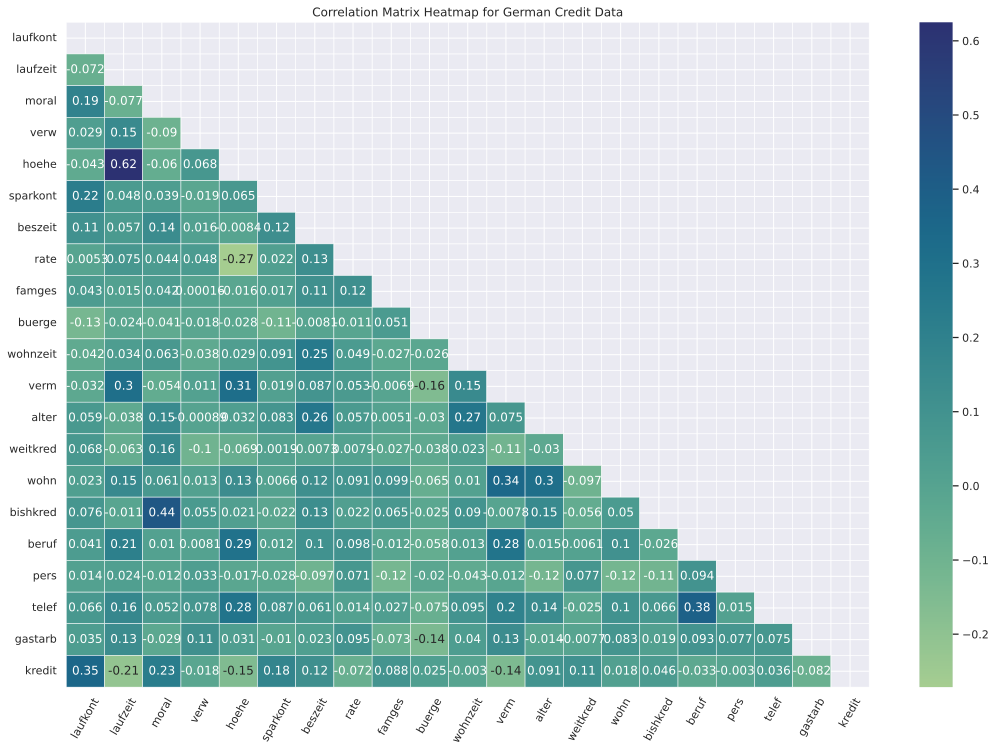

In [ ]:
# Generate a correlation matrix and visualize possible correlations between all numerical columns
correlation_matrix_1 = df.corr()
mask1 = np.triu(correlation_matrix_1)

plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix_1, annot=True, cmap='crest', linewidths=0.5, mask=mask1)
plt.title('Correlation Matrix Heatmap for German Credit Data')
plt.xticks(rotation=60)
plt.show()

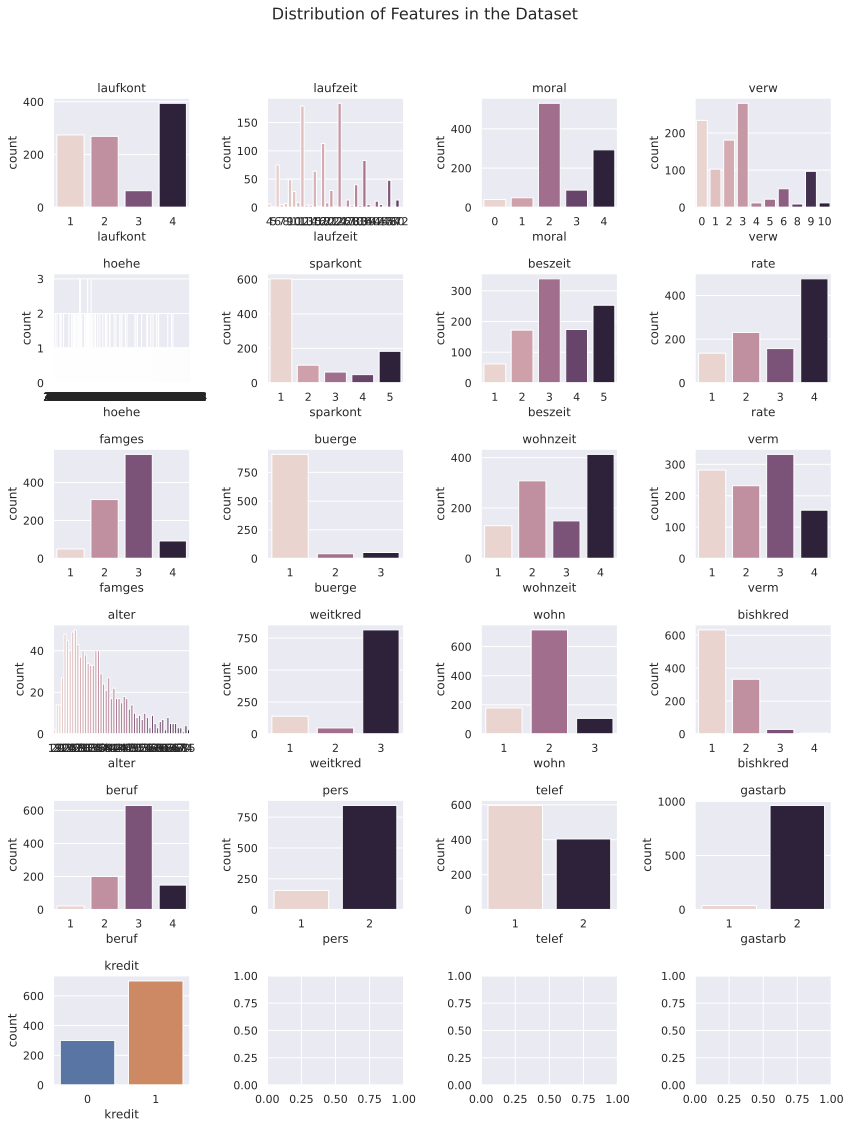

In [ ]:
# Visualize distribution of features
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(12, 16))
fig.suptitle('Distribution of Features in the Dataset', fontsize=16)

# Generate box plots for each column
for i, col in enumerate(df.columns):
    sns.countplot(x=col, hue=col, stat='count', data=df, legend=False, ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show();

Бачимо багато признаків є категоріальними.

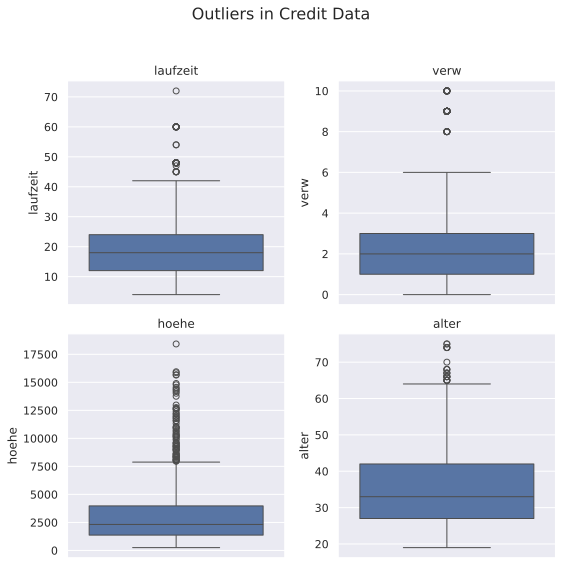

In [ ]:
# Let's check whether the countinues features have outliers
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
fig.suptitle('Outliers in Credit Data', fontsize=16)

# Generate box plots for each column
for i, col in enumerate(['laufzeit', 'verw', 'hoehe', 'alter']):
    sns.boxplot(y=df[col], ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## **2. Clean Data and Feature Engineering**

### 2.1. Scale data

In [ ]:
# Separate target
X = df.drop('kredit', axis=1)
y = df['kredit']

In [ ]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

## **3. Train K-means Clustering Algorithm**

### 3.1. Look for optimal number of clusters

* **Calculate Within-Cluster Sum of Squares (WCSS):** Для різних значень k, порахувати суму квадратів дистанцій між кожною точкою та центроїдом його кластеру. Таке значення є (WCSS) або inertia.

* **Plot WCSS to k:** Побудувати графік з кількістю кластерів k по вісі  x.

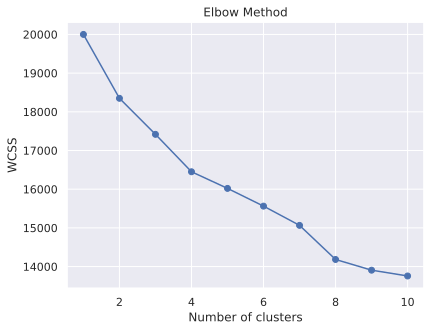

In [ ]:
# Define optimal number of clusters - elbow method has been applied
wcss = []
for i in range(1, 11):   # max k = 11
    kmeans = KMeans(n_clusters=i, random_state=17, n_init='auto')
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11, 1), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

**Різьке падіння графіку закінчується на значенні 4 (кластери), 3 або 4 мають бути оптимальним числом кластерів**

### 3.2. Train the Algorithm

In [ ]:
# Train K-means model with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=17, n_init='auto')
kmeans.fit(X_scaled)

# Add the cluster values to the dataset
df['cluster_kmeans'] = kmeans.labels_
df.head(3)

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit,cluster_kmeans
0,1,18,4,2,1049,1,2,4,2,1,...,21,3,1,1,3,2,1,2,1,1
1,1,9,4,0,2799,1,3,2,3,1,...,36,3,1,2,3,1,1,2,1,1
2,2,12,2,9,841,2,4,2,2,1,...,23,3,1,1,2,2,1,2,1,1


### 3.3. Visualize Clusters

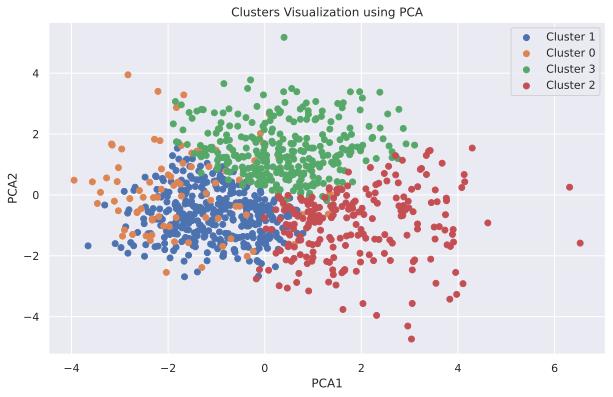

In [ ]:
# Reduce the dimensionality to 2D  - PCA has been applied
pca = PCA(n_components=2)
X_pca_kmeans = pca.fit_transform(X_scaled)

# Create DataFrame - include PCA components and cluster labels
pca_df = pd.DataFrame(data=X_pca_kmeans, columns=['PCA1', 'PCA2'])
pca_df['cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in pca_df['cluster'].unique():
    cluster_data = pca_df[pca_df['cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')

plt.title('Clusters Visualization using PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.grid(True)
plt.show()

**Бачимо досить чітке розділення на чотири кластери**

### 3.4. Interpretability of the Clusters Content

**Спробуємо подивитись на дані кожного кластеру, можливо ми зможемо знайти якусь сегментацію ціх людей/кредитів. Для цього візьмемо їх середні значення.**

In [ ]:
# Calculate the mean values for each feature in the clusters
cluster_means = df.groupby('cluster_kmeans').mean()
cluster_means.T

cluster_kmeans,0,1,2,3
laufkont,2.190476,2.314961,2.284444,3.216129
laufzeit,15.750000,16.217848,35.075556,17.770968
moral,2.488095,2.115486,2.235556,3.312903
verw,1.821429,2.564304,3.542222,2.906452
hoehe,2390.059524,2144.173228,6834.742222,2308.825806
sparkont,1.797619,1.818898,2.120000,2.529032
beszeit,3.321429,2.829396,3.400000,4.070968
rate,2.785714,2.871391,2.760000,3.303226
famges,2.904762,2.572178,2.671111,2.764516
buerge,2.309524,1.026247,1.071111,1.029032


## **4. Train DBSCAN (Density-Based Spatial Clustering of Applications with Noise) Algorithm for Clustering**

### 4.1. Look for optimal parameters: eps and min_samples

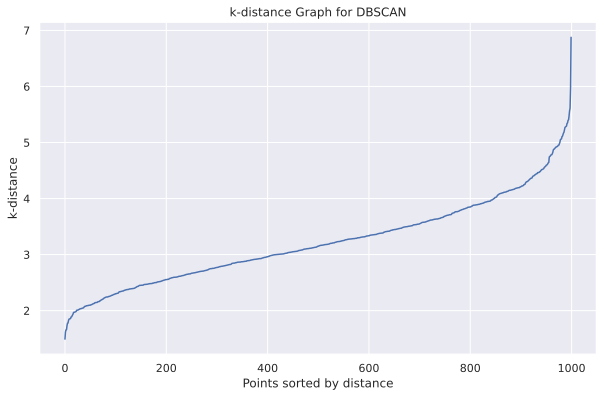

In [ ]:
# Calculate the k-nearest neighbors to find a good eps value
k = 4  # min_samples - 1
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Sort and plot the distances to the k-th nearest neighbor
distances = np.sort(distances[:, k-1], axis=0)

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('k-distance Graph for DBSCAN')
plt.xlabel('Points sorted by distance')
plt.ylabel('k-distance')
plt.grid(True)
plt.show()


* **Тут бачимо локоть на 4-5, можна використати це як 'eps'**
* **Але спробуємо ще один спосіб пошуку параметрів**

In [ ]:
# Set range for eps and min_samples
eps_values = np.arange(0.5, 7.0, 0.5)
min_samples_values = range(2, 10)

best_score = -1
best_params = None
best_labels = None

In [ ]:
# Grid search
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)

        # Silhouette score will be used if more than 1 cluster
        if len(set(labels)) > 1:
            score = silhouette_score(X_scaled, labels)
            if score > best_score:
                best_score = score
                best_params = (eps, min_samples)
                best_labels = labels

best_params, best_score

((5.5, 2), 0.39935878188242346)

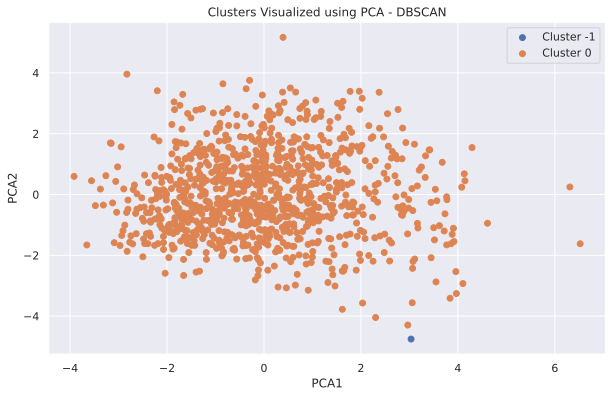

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit,cluster_kmeans,cluster_dbscan
0,1,18,4,2,1049,1,2,4,2,1,...,3,1,1,3,2,1,2,1,1,0
1,1,9,4,0,2799,1,3,2,3,1,...,3,1,2,3,1,1,2,1,1,0
2,2,12,2,9,841,2,4,2,2,1,...,3,1,1,2,2,1,2,1,1,0
3,1,12,4,0,2122,1,3,3,3,1,...,3,1,2,2,1,1,1,1,0,0
4,1,12,4,0,2171,1,3,4,3,1,...,1,2,2,2,2,1,1,1,0,0


In [ ]:
dbscan = DBSCAN(eps=5.5, min_samples=2)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Add the DBSCAN cluster labels to the dataset
df['cluster_dbscan'] = dbscan_labels

# Perform PCA for visualization
X_pca_dbscan = pca.fit_transform(X_scaled)

# Create a DataFrame - apply PCA components and DBSCAN cluster labels
pca_dbscan_df = pd.DataFrame(data=X_pca_dbscan, columns=['PCA1', 'PCA2'])
pca_dbscan_df['cluster'] = dbscan_labels

# Plot the clusters
plt.figure(figsize=(10, 6))
unique_clusters = sorted(pca_dbscan_df['cluster'].unique())
for cluster in unique_clusters:
    cluster_data = pca_dbscan_df[pca_dbscan_df['cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')

plt.title('Clusters Visualized using PCA - DBSCAN')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.grid(True)
plt.show()

df.head()

## **5. Train Spectral Clustering Algorithm**

(1000, 2)


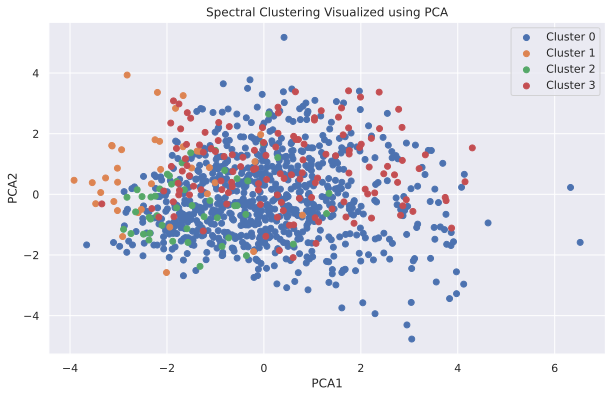

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,wohn,bishkred,beruf,pers,telef,gastarb,kredit,cluster_kmeans,cluster_dbscan,spectral_cluster
0,1,18,4,2,1049,1,2,4,2,1,...,1,1,3,2,1,2,1,1,0,0
1,1,9,4,0,2799,1,3,2,3,1,...,1,2,3,1,1,2,1,1,0,3
2,2,12,2,9,841,2,4,2,2,1,...,1,1,2,2,1,2,1,1,0,0
3,1,12,4,0,2122,1,3,3,3,1,...,1,2,2,1,1,1,1,0,0,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,2,2,2,1,1,1,0,0,1


In [ ]:
# Apply Spectral Clustering
spectral = SpectralClustering(n_clusters=4, random_state=0, affinity='nearest_neighbors')
spectral_labels = spectral.fit_predict(X_scaled)

# Add the Spectral Clustering labels to the original dataset
df['spectral_cluster'] = spectral_labels

# Perform PCA for visualization
X_pca_spectral = pca.fit_transform(X_scaled)

# Create a DataFrame - use PCA and Spectral Clustering labels
pca_spectral_df = pd.DataFrame(data=X_pca_spectral, columns=['PCA1', 'PCA2'])
pca_spectral_df['cluster'] = spectral_labels

# Plot the clusters
plt.figure(figsize=(10, 6))
unique_clusters = sorted(pca_spectral_df['cluster'].unique())
for cluster in unique_clusters:
    cluster_data = pca_spectral_df[pca_spectral_df['cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')

plt.title('Spectral Clustering Visualized using PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.grid(True)
plt.show()

df.head()

In [ ]:
pca.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': 2,
 'n_oversamples': 10,
 'power_iteration_normalizer': 'auto',
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

## **6. Evaluate All Three Algorithms with Metrics: Silhouette Score and Davies-Bouldin Index**

In [ ]:
# Use Silhouette Score for each clustering algorithm
kmeans_silhouette = silhouette_score(X_scaled, kmeans.labels_)
dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else float('nan')   # DBSCAN ставить лейбл -1 якщо вважає це за шум
spectral_silhouette = silhouette_score(X_scaled, spectral_labels)

In [ ]:
# Use Davies-Bouldin Index for each clustering algorithm
kmeans_db_idx = davies_bouldin_score(X_scaled, kmeans.labels_)
dbscan_db_idx = davies_bouldin_score(X_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else float('nan')
spectral_db_idx = davies_bouldin_score(X_scaled, spectral_labels)

# Create a DataFrame with results
comparison_df = pd.DataFrame({
    'Method': ['K-means', 'DBSCAN', 'Spectral Clustering'],
    'Silhouette Score': [kmeans_silhouette, dbscan_silhouette, spectral_silhouette],
    'Davies-Bouldin Index': [kmeans_db_idx, dbscan_db_idx, spectral_db_idx]
})

In [ ]:
comparison_df.head()

,Method,Silhouette Score,Davies-Bouldin Index
0,K-means,0.074209,2.704437
1,DBSCAN,0.399359,0.461311
2,Spectral Clustering,0.115209,2.252121


### Interpretation of Metrics

**Silhouette Score:**

* Measures how similar an object is to its own cluster compared to other clusters.
* Values range from -1 to 1, with higher values indicating better-defined clusters.

**Davies-Bouldin Index:**

* Measures the average similarity ratio of each cluster with its most similar cluster.
* Lower values indicate better clustering.

* **Найкращі метрики розподілу даних на кластери, за метрикою Silhouette Score та Davies-Boulding Index, показав DBSCAN алгоритм**
* **Але таке враження що DBSCAN на ціх даних не зміг створити кластери.**

## **6. Побудувати графік втрати інформації при зменшенні розмірності.**

In [ ]:
# Apply PCA to scaled data
pca_var = PCA()
X_pca_var = pca_var.fit_transform(X_scaled)

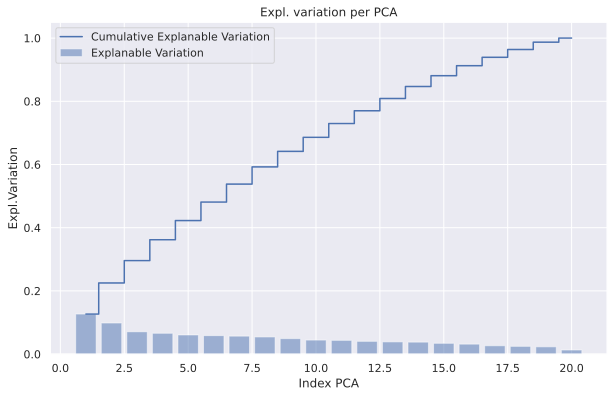

In [ ]:
# Calculate explanable variation
explained_variance = pca_var.explained_variance_ratio_

# Calculate cumelative expl. variation
cumulative_explained_variance = np.cumsum(explained_variance)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Explanable Variation')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Cumulative Explanable Variation')
plt.xlabel('Index PCA')
plt.ylabel('Expl.Variation')
plt.title('Expl. variation per PCA')
plt.legend(loc='best')
plt.grid(True)
plt.show()


* **Кілька перших компонент (4-5) зможуть пояснити найбільшу частину варіації даних, тобто ми вже будемо мати значну частину інформації використовуючи тільки кілька перших компонент.**    

## **7. Train Agglomerative Clustering Algorithm**

### 7.1. PCA Visualization

In [ ]:
# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels_1 = agg_clustering.fit_predict(X_scaled)

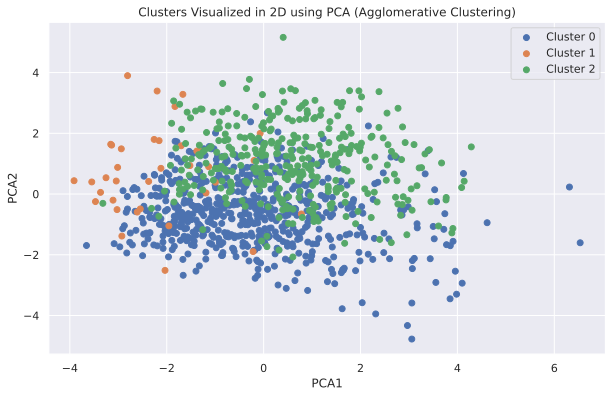

Silhouette Score for Agglomerative Clustering: 0.06862300722760142


In [ ]:
# Perform PCA (we have already calculate this earlier)
# pca = PCA()    # without n_components=2
# X_pca = pca.fit_transform(X_scaled)

X_pca_agg = pca.fit_transform(X_scaled)

pca_agg_df = pd.DataFrame(data=X_pca_agg, columns=['PCA1', 'PCA2'])
pca_agg_df['cluster'] = agg_labels_1

# Plot the clusters
plt.figure(figsize=(10, 6))
unique_clusters = sorted(pca_agg_df['cluster'].unique())
for cluster in unique_clusters:
    cluster_data = pca_agg_df[pca_agg_df['cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')

plt.title('Clusters Visualized in 2D using PCA (Agglomerative Clustering)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.grid(True)
plt.show()

# Calculate silhouette score for Agglomerative Clustering
agg_silhouette_1 = silhouette_score(X_scaled, agg_labels_1)
print(f'Silhouette Score for Agglomerative Clustering: {agg_silhouette_1}')

### 7.2. t-SNE Visualization

In [ ]:
# Apply Agglomerative Clustering to the standardized dataset
agg_clustering_2 = AgglomerativeClustering(n_clusters=6)
agg_labels_2 = agg_clustering_2.fit_predict(X_scaled)

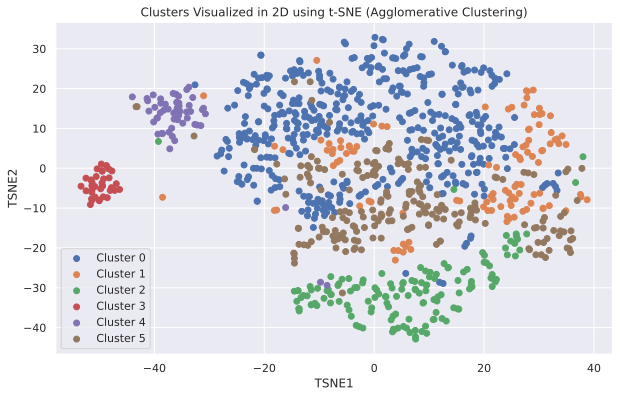

Silhouette Score for Agglomerative Clustering: 0.07332650576958318


In [ ]:
# Perform t-SNE for visualization
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X_scaled)

# Create a DataFrame with the t-SNE
tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['cluster'] = agg_labels_2

# Plot the clusters
plt.figure(figsize=(10, 6))
unique_clusters = sorted(tsne_df['cluster'].unique())
for cluster in unique_clusters:
    cluster_data = tsne_df[tsne_df['cluster'] == cluster]
    plt.scatter(cluster_data['TSNE1'], cluster_data['TSNE2'], label=f'Cluster {cluster}')

plt.title('Clusters Visualized in 2D using t-SNE (Agglomerative Clustering)')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.legend()
plt.grid(True)
plt.show()

# Calculate Silhouette score for Agglomerative Clustering
agg_silhouette_2 = silhouette_score(X_scaled, agg_labels_2)
print(f'Silhouette Score for Agglomerative Clustering: {agg_silhouette_2}')

**Найкращу якість вдалось отримати при кількості кластерів = 6, але в порівняні з іншими алгоритмами кластерізації це алгоритм має найгірші результати по метриці**

In [ ]:
################## END OF NOTEBOOK ########################